### <b>Data reminder</b>

In Colab, be sure to upload your <tt>.csv</tt> cleaned data file.

For example, to run the cell below you will need the <tt>iris_cleaned.csv</tt> file -- it's [here](https://drive.google.com/drive/folders/1Qnie8N2VCdumwaFxFldJ_1iQmvtb40pZ?usp=drive_link)

Download it to your machine and then upload it to Colab into the _folder_ &nbsp; icon at left.

In [ ]:
#
# Modern modeling ~ iris_modeler:  All-in-one iris clasification via DT + RF
#

### Iris classification via <b>Decision Trees</b> (here) and Random Forests (below)

This is the whole ML workflow! You can show/no-show parts with <tt>if True</tt> and <tt>if False</tt>

+ Section 1: Library imports
+ Section 2: Read the already-cleaned iris data  (it's [here](https://drive.google.com/drive/folders/1Qnie8N2VCdumwaFxFldJ_1iQmvtb40pZ?usp=drive_link) as <tt>iris_cleaned.csv</tt>)
+ Section 3:  Drop any columns we don't want to use
+ Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
+ Section 5:  convert from pandas (spreadsheet) to numpy (array)
+ Section 6:  define our features (X_all) and our target-to-predict (y_all)
+ Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
+ Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
+ Section 9:  Let's see how our model does on the TEST data...
+ Section 10:  Let's cross-validate to find the "best" depth
+ Section 11:  Let's build a final model + find _feature importances_

## First, <b>Decision Trees</b>

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "iris_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('irisname', axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print("Created and trained a classifier with best_depth =", best_depth)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = dtree_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
best_accuracy = 0.0  # also not correct...
for depth in range(1,6):    # Note that we are cross-validating using only our TRAINING data!
    dtree_cv_model = tree.DecisionTreeClassifier(max_depth=depth)   # build a knn_model for every k
    cv_scores = cross_val_score( dtree_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    if False: print(f"depth: {depth:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_depth = depth                        # with the best k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!
if True: print(f"best_depth = {best_depth}  \n    yields the highest cv accuracy: {best_accuracy}\n")  # print the best one

# Section 11:  Here's where the model-building happens with the best-found parameters:
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model_final.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("Created and trained a classifier with best_depth =", best_depth)
# print the feature importances...
if False:  print("\nThe feature importances are", dtree_model_final.feature_importances_)

Cross-validating...
best_depth = 5  
    yields the highest cv accuracy: 0.9553359683794467

Created and trained a classifier with best_depth = 5


### Optional:  Let's format things more carefully...

In [ ]:
#
# Let's print things in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!  use the model you want:
predicted_labels = dtree_model_final.predict(X_test)      # THIS IS THE KEY LINE:  predict
compare_labels(predicted_labels,actual_labels)


row   # :    predicted actual         result
row   0 :   versicolor versicolor     
row   1 :       setosa setosa         
row   2 :    virginica virginica      
row   3 :    virginica virginica      
row   4 :       setosa setosa         
row   5 :   versicolor versicolor     
row   6 :   versicolor versicolor     
row   7 :   versicolor versicolor     
row   8 :   versicolor versicolor     
row   9 :    virginica virginica      
row  10 :   versicolor versicolor     
row  11 :   versicolor versicolor     
row  12 :   versicolor versicolor     
row  13 :    virginica virginica      
row  14 :   versicolor versicolor     
row  15 :       setosa setosa         
row  16 :    virginica virginica      
row  17 :       setosa setosa         
row  18 :    virginica virginica      
row  19 :    virginica virginica      
row  20 :    virginica virginica      
row  21 :    virginica virginica      
row  22 :   versicolor versicolor     
row  23 :       setosa setosa         
row  24 :    virgi

29

Optional: See the Decision tree...

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petallen <= 2.6\ngini = 0.667\nsamples = 141\nvalue = [47.0, 46.0, 48.0]\nclass = virginica", fillcolor="#fefdff"] ;
1 [label="gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petalwid <= 1.75\ngini = 0.5\nsamples = 94\nvalue = [0.0, 46.0, 48.0]\nclass = virginica", fillcolor="#faf7fe"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petallen <= 4.95\ngini = 0.18\nsamples = 50\nvalue = [0, 45, 5]\nclass = versicolor", fillcolor="#4fe88f"] ;
2 -> 3 ;
4 [label="petalwid <= 1.65\ngini = 0.044\nsamples = 44\nvalue = [0, 43, 1]\nclass = versicolor", fillcolor="#3ee684"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 4

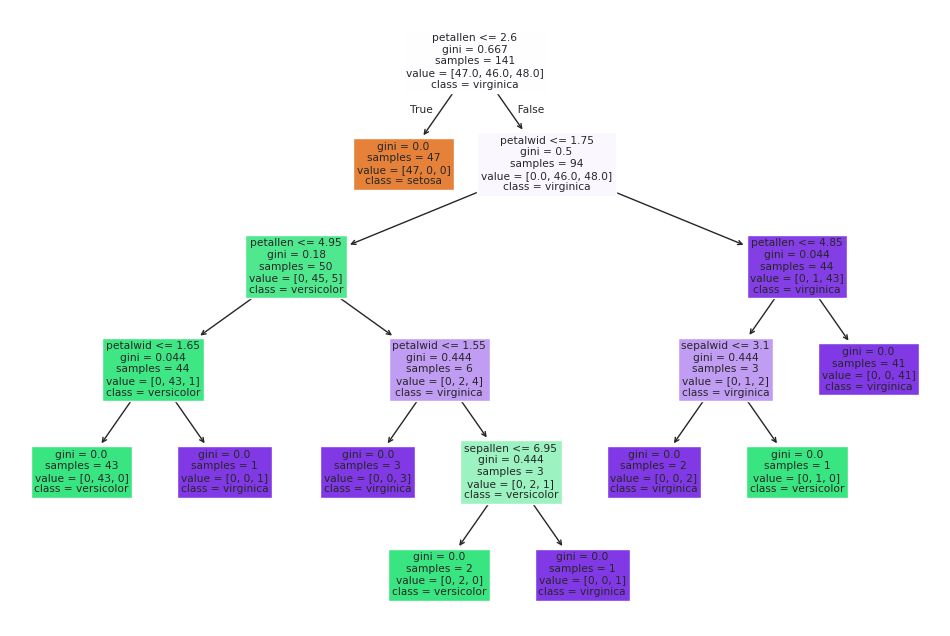

In [ ]:
import matplotlib.pyplot as plt

FEATURES = COLUMNS[0:4]

#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv
model = dtree_model_final

tree.export_graphviz(model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

#
# Tree display...
#
fig = plt.figure(figsize=(12,8))
tree_plot = tree.plot_tree(model,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True)

plt.show()

### Optional:  Use the predictive model!

We can use the predictive model to make predictions and try it out!

In [ ]:
#
# Ok!  We have our model, let's use it...
#
# ... in a data-trained predictive model (k-nearest-neighbors), using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"
#
def predictive_model( Features, model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                      # extra brackets needed so it's 2d
    predicted_species_list = model.predict(our_features)   # PREDICT!

    predicted_species = int(round(predicted_species_list[0]))  # unpack the one element it contains
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
ListofFeatures = [ [4.2,3.1,2.0,0.4],
                   [5.8,2.7,4.1,1.0],
                   [4.6,3.6,3.0,2.2],
                   [6.7,3.3,5.7,2.1],
                   [4.2,4.2,4.2,4.2],
                   [1.0,42,4.7,0.01],        # -4.7? .01?  0?
                   ]

for Features in ListofFeatures:
    predicted_species = predictive_model( Features, dtree_model_final )
    name = SPECIES[predicted_species]                          # look up the species
    print(f"From the Features {Features}, I predict : {name}")

From the Features [4.2, 3.1, 2.0, 0.4], I predict : setosa
From the Features [5.8, 2.7, 4.1, 1.0], I predict : versicolor
From the Features [4.6, 3.6, 3.0, 2.2], I predict : versicolor
From the Features [6.7, 3.3, 5.7, 2.1], I predict : virginica
From the Features [4.2, 4.2, 4.2, 4.2], I predict : versicolor
From the Features [1.0, 42, 4.7, 0.01], I predict : versicolor


### Predictive models aren't perfect!
+ Notice that the fourth prediction above is (probably) wrong
  + It probably predicted _versicolor_, but it was actually a _virginica_
  + In essence, it was a _virginica_ iris that "looked more like" a _versicolor_ ... ***from these four features!***
  + A botanist would use more than these four features to classify difference species...

+ **Key**: Even when the modeling process runs "perfectly," the models are likely to be imperfect...
+ ... it's just that we won't know where the imperfections are -- until future observations arrive!

### That's it! Our model is complete...

... not perfect, but **complete**

What does this mean?

It means that the model -- the function (above) -- is ***already*** prepared to provide an output for every possible input!

We can see this in a plot of the outputs for every input in the "sepal" plane (length vs. width) as well as the "petal" plane:

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 4.0
sepalwid = 2.0
# petallen =
# petalwid =

VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = dtree_model_final


col = 0
row = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the lower-left corner

..........................................
......................................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


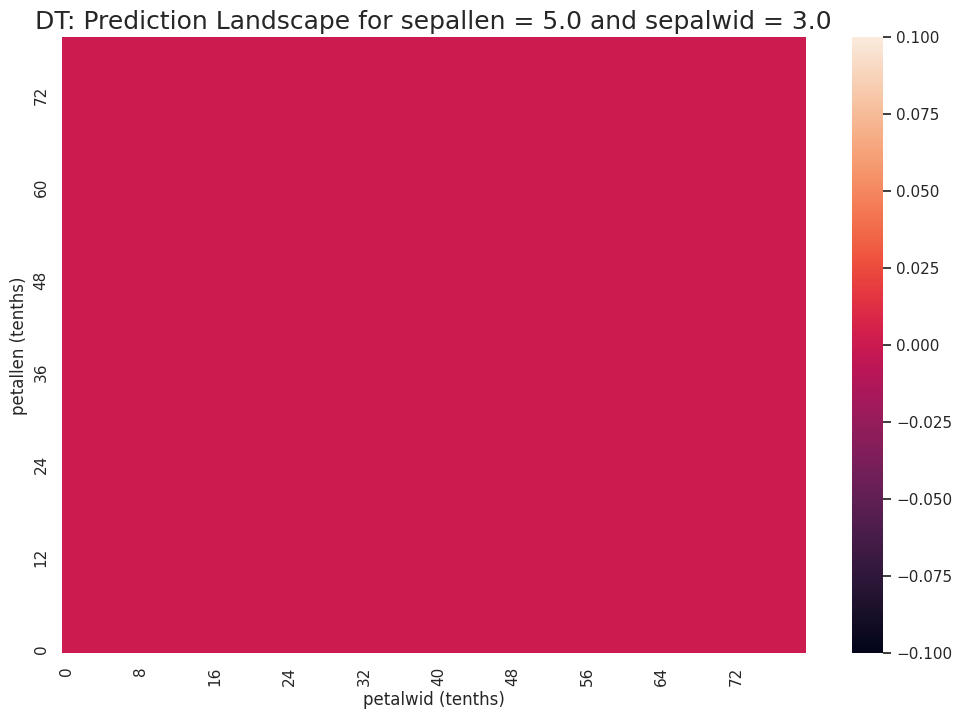

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="petalwid (tenths)", ylabel="petallen (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])
ax.set_title("DT: Prediction Landscape for sepallen = 5.0 and sepalwid = 3.0", fontsize=18)


print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

<br>
<hr>
<br>

## Next, <b>Random Forests</b>

Random Forests are simply a LOT of decision trees...

After you have a lot of decision trees, they all vote on how to classify a new input observation!

The Machine Learning workflow is exactly the same: only the algorithm name changes:

### Iris classification via Decision Trees (above) and <b>Random Forests</b> (here)

This is simply a repeat of whole ML workflow, because it's an amazing advantage to have the whole process in mind! (No harm in repeating it here!) You can show/no-show parts with <tt>if True</tt> and <tt>if False</tt>

+ Section 1: Library imports
+ Section 2: Read the already-cleaned iris data  (you're set - you used it above)
+ Section 3:  Drop any columns we don't want to use
+ Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
+ Section 5:  convert from pandas (spreadsheet) to numpy (array)
+ Section 6:  define our features (X_all) and our target-to-predict (y_all)
+ Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
+ Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
+ Section 9:  Let's see how our model does on the TEST data...
+ Section 10:  Let's cross-validate to find the "best" depth
+ Section 11:  Let's build a final model + find _feature importances_

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "iris_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('irisname', axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier
best_d = 1            # we don't know what depth to use, so let's guess 1 (not a good guess)
best_num_trees = 42   # we don't know how many trees to use, so let's guess 42
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, n_estimators=best_num_trees, max_samples=0.5)  # 0.5 of the data each tree
rforest_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print(f"Built a Random Forest with depth={best_d} and number of trees={best_num_trees}")

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = rforest_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_d = 1         # range(1,6)
best_num_trees = 50   # [50,150,250]
best_accuracy = 0
for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, n_estimators=ntrees,max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        if True: print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy;   best_d = d;      best_num_trees = ntrees
if True: print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

# Section 11:  Here's where the model-building happens with the best-found parameters:
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, n_estimators=best_num_trees, max_samples=0.5)
rforest_model_tuned.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("Created and trained a classifier with best_depth =", best_depth)
# print the feature importances...
if False:  print("\nThe feature importances are", rforest_model_tuned.feature_importances_)

Cross-validating...
depth:  1 ntrees:  50 cv accuracy:  0.9545
depth:  1 ntrees: 150 cv accuracy:  0.9731
depth:  1 ntrees: 250 cv accuracy:  0.9640
depth:  2 ntrees:  50 cv accuracy:  0.9636
depth:  2 ntrees: 150 cv accuracy:  0.9640
depth:  2 ntrees: 250 cv accuracy:  0.9549
depth:  3 ntrees:  50 cv accuracy:  0.9731
depth:  3 ntrees: 150 cv accuracy:  0.9640
depth:  3 ntrees: 250 cv accuracy:  0.9731
depth:  4 ntrees:  50 cv accuracy:  0.9731
depth:  4 ntrees: 150 cv accuracy:  0.9640
depth:  4 ntrees: 250 cv accuracy:  0.9640
depth:  5 ntrees:  50 cv accuracy:  0.9640
depth:  5 ntrees: 150 cv accuracy:  0.9640
depth:  5 ntrees: 250 cv accuracy:  0.9640
best_depth: 5 and best_num_trees: 150 are our choices. Acc: 0.9731225296442687
Created and trained a classifier with best_depth = 5


One of the forest's trees is DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=524526689)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petallen <= 4.8\ngini = 0.662\nsamples = 56\nvalue = [23, 20, 27]\nclass = virginica", fillcolor="#f4eefd"] ;
1 [label="petallen <= 2.5\ngini = 0.495\nsamples = 32\nvalue = [23.0, 19.0, 0.0]\nclass = setosa", fillcolor="#fae9dd"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 18\nvalue = [23, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 14\nvalue = [0, 19, 0]\nclass = versicolor", fillcolor="#39e581"] ;
1 -> 3 ;
4 [label="petalwid <= 1.7\ngini = 0.069\nsamples = 24\nvalue = [0, 1, 27]\nclass = virginica", fillcolor="#8640e6"] ;
0 -> 4 [labeldist

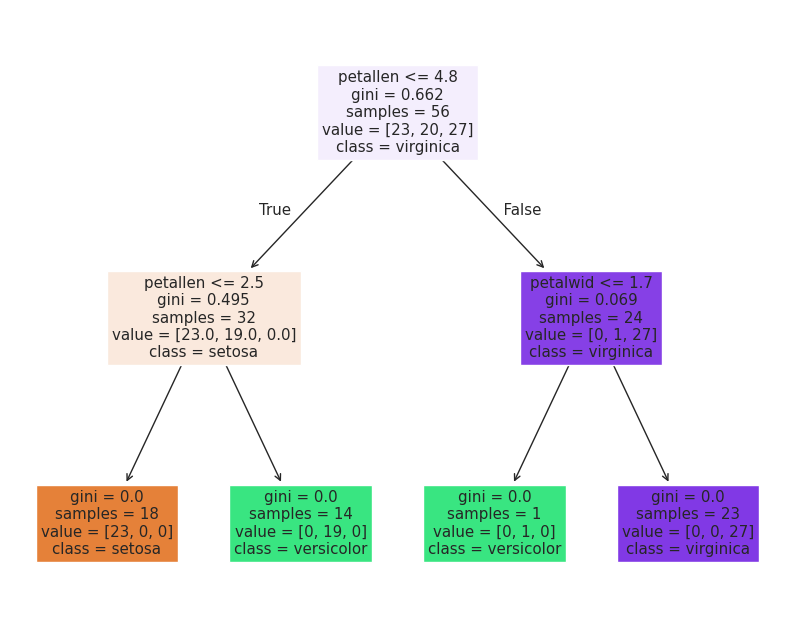

In [ ]:
#
# we can get the individual trees, if we want...  Let's try it on tree #28
#
tree_index = 28   # which tree
one_rf_tree = rforest_model_tuned.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

# One tree:
fig = plt.figure(figsize=(10,8))
tree_plot = tree.plot_tree(one_rf_tree,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True)

In [ ]:
#
# final predictive model (random forests), with tuned parameters + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [6.7,3.3,5.7,0.1]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoF = [
[4.8, 3.1, 1.6, 0.2 ],   # actually setosa
[5.7, 2.9, 4.2, 1.3 ],   # actually versicolor
[5.8, 2.7, 5.1, 1.9 ],   # actually virginica
[5.2, 4.1, 1.5, 0.1 ],   # actually setosa
[5.4, 3.4, 1.5, 0.4 ],   # actually setosa
[5.1, 2.5, 3.0, 1.1 ],   # actually versicolor
[6.2, 2.9, 4.3, 1.3 ],   # actually versicolor
[6.3, 3.3, 6.0, 2.5 ],   # actually virginica
[5.7, 2.8, 4.1, 1.3 ],   # actually virginica  <-- almost always wrong!
]

# run on each one:
for Features in LoF:
    predicted_species = predictive_model( Features, rforest_model_tuned )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"from the features {Features} I predict {name}")    # Answers in the assignment...

from the features [4.8, 3.1, 1.6, 0.2] I predict setosa
from the features [5.7, 2.9, 4.2, 1.3] I predict versicolor
from the features [5.8, 2.7, 5.1, 1.9] I predict virginica
from the features [5.2, 4.1, 1.5, 0.1] I predict setosa
from the features [5.4, 3.4, 1.5, 0.4] I predict setosa
from the features [5.1, 2.5, 3.0, 1.1] I predict versicolor
from the features [6.2, 2.9, 4.3, 1.3] I predict versicolor
from the features [6.3, 3.3, 6.0, 2.5] I predict virginica
from the features [5.7, 2.8, 4.1, 1.3] I predict versicolor


#### We can visualize parameter space...

_for any model_ &nbsp; Let's "see inside" our Random Forest:

+ first by computing all of the predictions in two dimensions
+ then by showing them as a heatmap!

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 5.0
sepalwid = 3.0
# petallen =
# petalwid =

VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = rforest_model_tuned

col = 0
row = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner

..........................................
......................................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


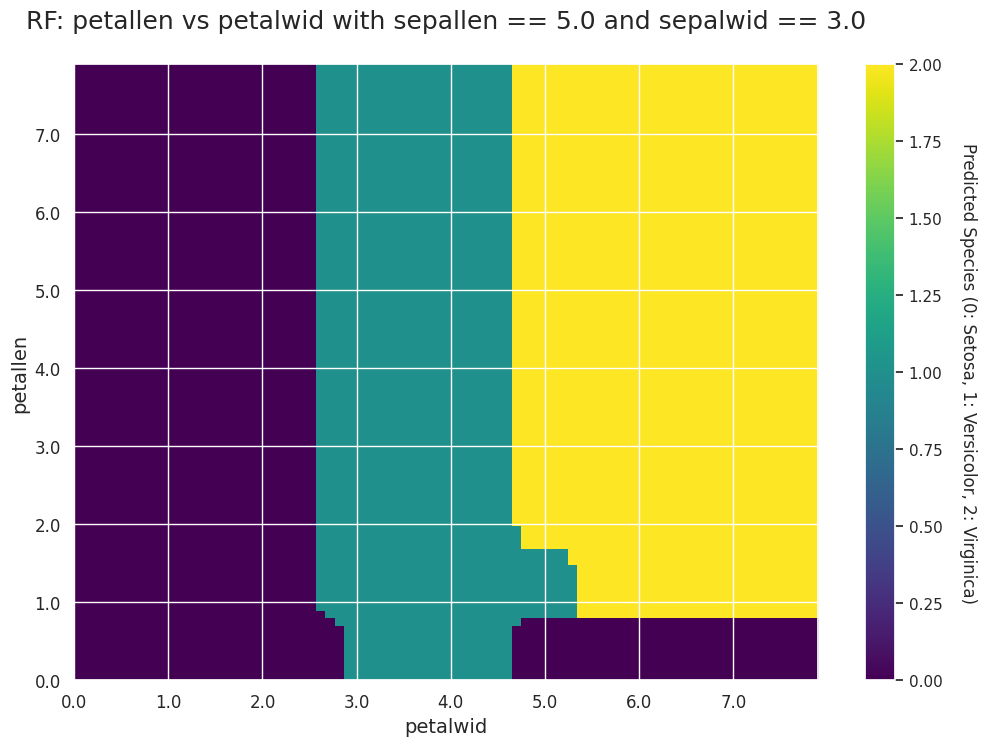

Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

#sns.set(rc = {'figure.figsize':(18,12)})  # figure size!

fig, ax = plt.subplots(figsize=(12,8))

# Create the heatmap
im = ax.imshow(PLANE, cmap="viridis", extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()], origin="lower", aspect="auto")

# Set axis labels and ticks
ax.set_xlabel("petalwid", fontsize=14)
ax.set_ylabel("petallen", fontsize=14)

ax.set_title(f"RF: petallen vs petalwid with sepallen == {sepallen:.1f} and sepalwid == {sepalwid:.1f}\n", fontsize=18)
# Calculate the indices for reduced ticks and labels
reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)
# Ensure that the last index is included
# if reduced_tick_indices[-1] != len(HORIZONT)-1:
#   reduced_tick_indices = np.append(reduced_tick_indices, len(HORIZONT)-1)


# Set ticks and tick labels with correct values
ax.set_xticks(HORIZONT[reduced_tick_indices]) # Display ticks every 0.4 unit
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{x:.1f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)  # Format x-axis labels
ax.set_yticklabels([f"{y:.1f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)  # Format y-axis labels

# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Species (0: Setosa, 1: Versicolor, 2: Virginica)', rotation=270, labelpad=25)

plt.show()

print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

We've done it!

Remember that the model _thinks_ it knows everything...

The _feature importances_ are probably what it knows the best:

In [ ]:
rforest_model_tuned.feature_importances_

<br>
<hr>
<br>

# Your tasks!

Based on the examples above, your task is to build a DT+RF model (along with the tests and visualizations) for two datasets:

*   the births dataset and
*   the digits dataset

<br>
<hr>
<br>

Suggestion:  Perhaps open this notebook twice...

_Then you can copy-paste-adapt the iris workflow to each new dataset!_

<br>
<hr>
<br>

As optional EC, track down another dataset of your own choosing and build a DT+RF model  

Notice that this can be an excellent final project, too! 😃

### First : Births classification via <b>Decision Trees</b>  

In [ ]:
# Section 1: Libraries
import time
import sklearn
import numpy as np
import pandas as pd
# Section 2: Read the already-cleaned data
cleaned_filename = "births_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3: Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('above/below median', axis=COLUMN)
if False: print("df_model1 is\n", df_model1)

# Section 4: create COLUMNS and SPECIES variables
COLUMNS = df_model1.columns
SPECIES = ['below','above']
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }
if False: print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5: convert from pandas to numpy
A = df_model1.to_numpy()
A = A.astype('float64')
NUM_ROWS, NUM_COLS = A.shape
if False: print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6: define our features and target
X_all = A[:,0:3]  # month, day, births
y_all = A[:,3]    # popularity
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7: split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"X_train (first few rows): {X_train[0:5,:]}")

# Section 8: build a decision tree
from sklearn import tree
best_depth = 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model.fit(X_train, y_train)
if False: print("Created and trained a classifier with best_depth =", best_depth)

# Section 9: test the model
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10: cross-validation
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_depth = 1
best_accuracy = 0.0
for depth in range(1,6):
    dtree_cv_model = tree.DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(dtree_cv_model, X_train, y_train, cv=5)
    this_cv_accuracy = cv_scores.mean()
    if False: print(f"depth: {depth:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:
        best_accuracy = this_cv_accuracy
        best_depth = depth
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)
if True: print(f"best_depth = {best_depth}  \n    yields the highest cv accuracy: {best_accuracy}\n")

# Section 11: final model
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model_final.fit(X_all, y_all)
if True: print("Created and trained a classifier with best_depth =", best_depth)
if False: print("\nThe feature importances are", dtree_model_final.feature_importances_)


Cross-validating...
best_depth = 1  
    yields the highest cv accuracy: 0.9965517241379309

Created and trained a classifier with best_depth = 1


In [ ]:
# Let's print things in a vertical table

def compare_labels(predicted_labels, actual_labels):
    """ show predictions vs actuals in simple table """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>8s} {"actual":<8s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))  # prediction
        a = int(round(actual_labels[i]))     # actual
        result = "incorrect"
        if p == a:
            result = ""
            num_correct += 1
        print(f"row {i:>3d} : {SPECIES[p]:>8s} {SPECIES[a]:<8s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# try it with the final model
predicted_labels = dtree_model_final.predict(X_test)
compare_labels(predicted_labels, actual_labels)



row   # : predicted actual     result
row   0 :    above above      
row   1 :    below below      
row   2 :    below below      
row   3 :    below below      
row   4 :    below below      
row   5 :    below below      
row   6 :    above above      
row   7 :    above above      
row   8 :    above above      
row   9 :    below below      
row  10 :    above above      
row  11 :    above above      
row  12 :    above above      
row  13 :    above above      
row  14 :    above above      
row  15 :    below below      
row  16 :    below below      
row  17 :    above above      
row  18 :    above above      
row  19 :    below below      
row  20 :    below below      
row  21 :    below below      
row  22 :    above above      
row  23 :    above above      
row  24 :    above above      
row  25 :    below below      
row  26 :    above above      
row  27 :    above above      
row  28 :    below below      
row  29 :    below below      
row  30 :    below below      


73

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="births <= 190942.5\ngini = 0.5\nsamples = 365\nvalue = [179, 186]\nclass = above", fillcolor="#f8fbfe"] ;
1 [label="gini = 0.0\nsamples = 179\nvalue = [179, 0]\nclass = below", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 186\nvalue = [0, 186]\nclass = above", fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


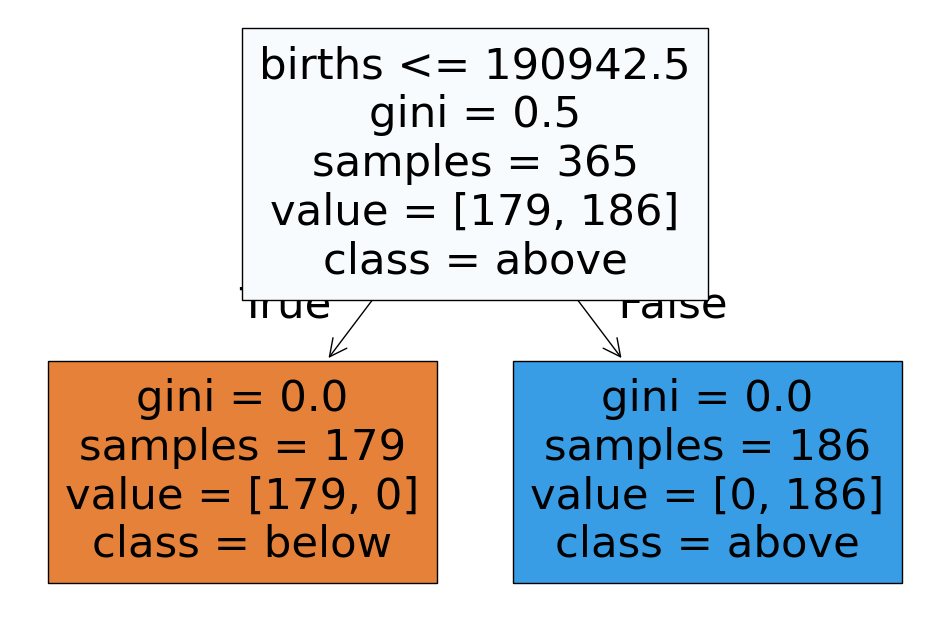

In [ ]:
# Section: Visualize the decision tree

import matplotlib.pyplot as plt

FEATURES = COLUMNS[0:3]  # month, day, births

# save the tree to a .gv file
filename = 'tree_data.gv'
model = dtree_model_final

from sklearn import tree
tree.export_graphviz(model, out_file=filename,
                     feature_names=FEATURES,
                     filled=True,
                     rotate=False,
                     class_names=SPECIES,
                     leaves_parallel=True)

# print the file content (to paste at http://viz-js.com/)
with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

# display the tree
fig = plt.figure(figsize=(12,8))
tree_plot = tree.plot_tree(model,
                   feature_names=FEATURES,
                   class_names=SPECIES,
                   filled=True)

plt.show()


In [ ]:
# Section: Try model predictions on manual inputs

def predictive_model(Features, model):
    """ input: a list of three features [month, day, births]
        output: predicted popularity (0 or 1)
    """
    our_features = np.asarray([Features])  # make it 2D
    predicted_label = model.predict(our_features)
    predicted_label = int(round(predicted_label[0]))
    return predicted_label

# try the model on custom inputs
ListofFeatures = [
    [1, 1, 150000],
    [6, 15, 190000],
    [12, 25, 210000],
    [7, 4, 195000],
    [3, 8, 180000],
    [10, 10, 170000]
]

for Features in ListofFeatures:
    predicted = predictive_model(Features, dtree_model_final)
    name = SPECIES[predicted]
    print(f"From the Features {Features}, I predict : {name}")


From the Features [1, 1, 150000], I predict : below
From the Features [6, 15, 190000], I predict : below
From the Features [12, 25, 210000], I predict : above
From the Features [7, 4, 195000], I predict : above
From the Features [3, 8, 180000], I predict : below
From the Features [10, 10, 170000], I predict : below


In [ ]:
# Section: Create prediction plane using two variables

# we'll fix one variable (month), and vary day and births
fixed_month = 6

VERTICAL = np.arange(150000, 220000, 1000)  # births
HORIZONT = np.arange(1, 32, 1)              # day of month
PLANE = np.zeros((len(HORIZONT), len(VERTICAL)))
MODEL = dtree_model_final

col = 0
row = 0
for births in VERTICAL:
    for day in HORIZONT:
        Features = [fixed_month, day, births]
        output = predictive_model(Features, MODEL)
        PLANE[row, col] = output
        row += 1
    row = 0
    col += 1
    print(".", end="")
    if col % 10 == 0: print()

# Show small part of the plane
print("\n", PLANE[0:3, 0:3])


..........
..........
..........
..........
..........
..........
..........

 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


0 - below
1 - above


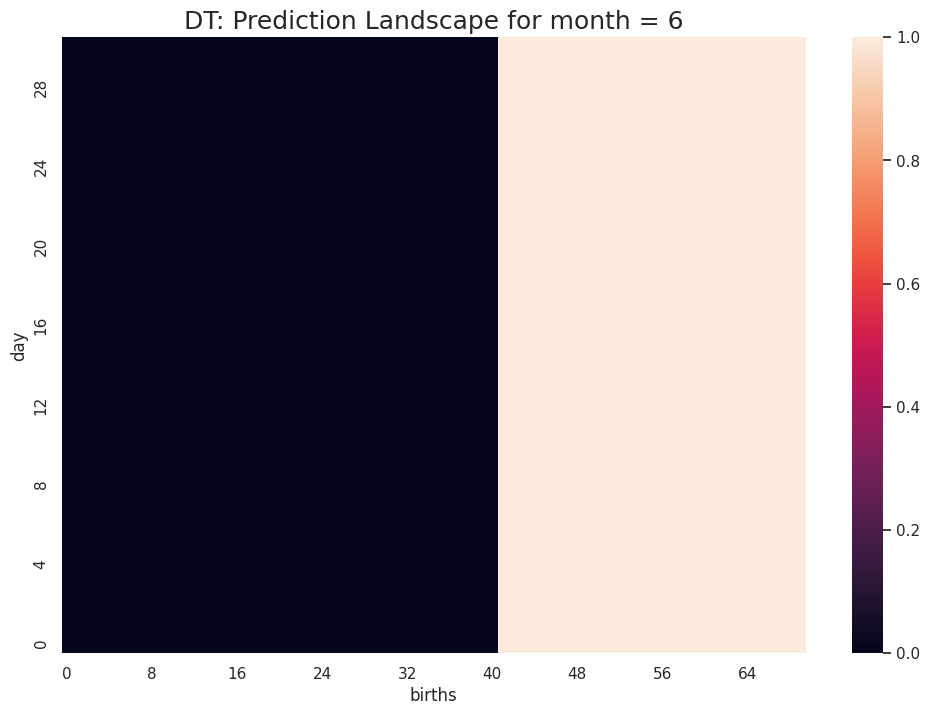

In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(12,8)})  # figure size
ax = sns.heatmap(PLANE)
ax.invert_yaxis()  # keep visual order

# axis labels
ax.set(xlabel="births", ylabel="day")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])
ax.set_title("DT: Prediction Landscape for month = 6", fontsize=18)

# print the label mapping
print("0 - below")
print("1 - above")


  ### Births classification via <b>Random Forests</b>

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn
import numpy as np
import pandas as pd

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "births_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('above/below median', axis=COLUMN)
if False: print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables
COLUMNS = df_model1.columns
SPECIES = ['below','above']
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }
if False: print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas to numpy
A = df_model1.to_numpy()
A = A.astype('float64')
NUM_ROWS, NUM_COLS = A.shape
if False: print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features and target
X_all = A[:,0:3]  # month, day, births
y_all = A[:,3]    # popularity
if False:
    print(f"The labels/species are \n {y_all} \n ")
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"X_train (first few rows): {X_train[0:5,:]}")

# Section 8:  Build Random Forest model
from sklearn import tree
from sklearn import ensemble
best_d = 1
best_num_trees = 42
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, n_estimators=best_num_trees, max_samples=0.5)
rforest_model.fit(X_train, y_train)
if False: print(f"Built a Random Forest with depth={best_d} and number of trees={best_num_trees}")

# Section 9:  test model on X_test
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Cross-validation
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_d = 1
best_num_trees = 50
best_accuracy = 0
for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, n_estimators=ntrees, max_samples=0.5)
        cv_scores = cross_val_score(rforest_model, X_train, y_train, cv=5)
        average_cv_accuracy = cv_scores.mean()
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_depth = d
            best_num_trees = ntrees
if True: print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

# Section 11:  Final model training with best params
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, n_estimators=best_num_trees, max_samples=0.5)
rforest_model_tuned.fit(X_all, y_all)
if True: print("Created and trained a classifier with best_depth =", best_depth)
if False: print("\nThe feature importances are", rforest_model_tuned.feature_importances_)


Cross-validating...
depth:  1 ntrees:  50 cv accuracy:  0.9863
depth:  1 ntrees: 150 cv accuracy:  0.9862
depth:  1 ntrees: 250 cv accuracy:  0.9897
depth:  2 ntrees:  50 cv accuracy:  0.9897
depth:  2 ntrees: 150 cv accuracy:  0.9863
depth:  2 ntrees: 250 cv accuracy:  0.9897
depth:  3 ntrees:  50 cv accuracy:  0.9932
depth:  3 ntrees: 150 cv accuracy:  0.9863
depth:  3 ntrees: 250 cv accuracy:  0.9863
depth:  4 ntrees:  50 cv accuracy:  0.9932
depth:  4 ntrees: 150 cv accuracy:  0.9863
depth:  4 ntrees: 250 cv accuracy:  0.9897
depth:  5 ntrees:  50 cv accuracy:  0.9897
depth:  5 ntrees: 150 cv accuracy:  0.9863
depth:  5 ntrees: 250 cv accuracy:  0.9863
best_depth: 3 and best_num_trees: 50 are our choices. Acc: 0.9931618936294566
Created and trained a classifier with best_depth = 3


One of the forest's trees is DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=76181811)
digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="births <= 191068.0\ngini = 0.499\nsamples = 149\nvalue = [88.0, 94.0]\nclass = above", fillcolor="#f2f9fd"] ;
1 [label="gini = 0.0\nsamples = 74\nvalue = [88, 0]\nclass = below", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 75\nvalue = [0, 94]\nclass = above", fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


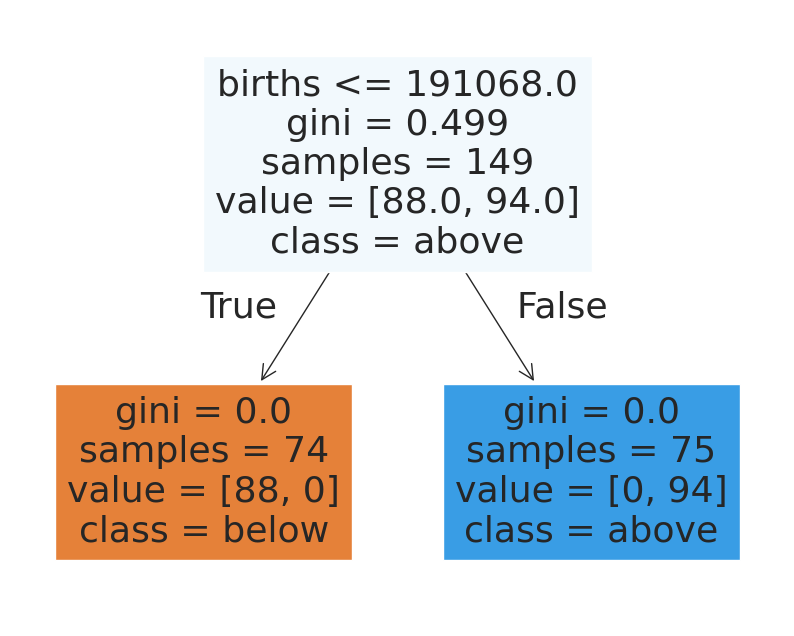

In [ ]:
# Section: Visualize one tree from the Random Forest

tree_index = 28  # which tree to look at
one_rf_tree = rforest_model_tuned.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# Save the tree to a .gv file (for external visualization)
FEATURES = COLUMNS[0:3]  # month, day, births
filename = f'rf_tree_{tree_index:03d}.gv'
tree.export_graphviz(one_rf_tree, out_file=filename,
                     feature_names=FEATURES,
                     filled=True,
                     rotate=False,
                     class_names=SPECIES,
                     leaves_parallel=True)

# Show file content (can be copied to http://viz-js.com/)
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

# Plot the selected tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
tree_plot = tree.plot_tree(one_rf_tree,
                   feature_names=FEATURES,
                   class_names=SPECIES,
                   filled=True)


In [ ]:
def predictive_model(Features, Model):
    """ input: a list of 3 features [month, day, births]
        output: predicted label from model: 0 or 1
    """
    our_features = np.asarray([Features])
    predicted_label = Model.predict(our_features)
    predicted_label = int(round(predicted_label[0]))
    return predicted_label

# Try it!
LoF = [
    [1, 1, 150000],
    [6, 15, 180000],
    [12, 25, 210000],
    [7, 4, 200000],
    [3, 8, 170000],
    [11, 11, 160000],
    [5, 10, 185000],
    [10, 30, 215000],
    [8, 21, 190000]
]

# run predictions
for Features in LoF:
    predicted = predictive_model(Features, rforest_model_tuned)
    name = SPECIES[predicted]
    print(f"from the features {Features} I predict {name}")


from the features [1, 1, 150000] I predict below
from the features [6, 15, 180000] I predict below
from the features [12, 25, 210000] I predict above
from the features [7, 4, 200000] I predict above
from the features [3, 8, 170000] I predict below
from the features [11, 11, 160000] I predict below
from the features [5, 10, 185000] I predict below
from the features [10, 30, 215000] I predict above
from the features [8, 21, 190000] I predict below


In [ ]:
# Section: RF Prediction Landscape - 2D grid

# We'll fix month = 6, and vary day and births
fixed_month = 6

VERTICAL = np.arange(150000, 220000, 1000)  # births
HORIZONT = np.arange(1, 32, 1)              # days
PLANE = np.zeros((len(HORIZONT), len(VERTICAL)))
MODEL = rforest_model_tuned

col = 0
row = 0
for births in VERTICAL:
    for day in HORIZONT:
        Features = [fixed_month, day, births]
        output = predictive_model(Features, MODEL)
        PLANE[row, col] = output
        row += 1
    row = 0
    col += 1
    print(".", end="")
    if col % 10 == 0: print()

# Show small part of the prediction matrix
print("\n", PLANE[0:3, 0:3])


..........
..........
..........
..........
..........
..........
..........

 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


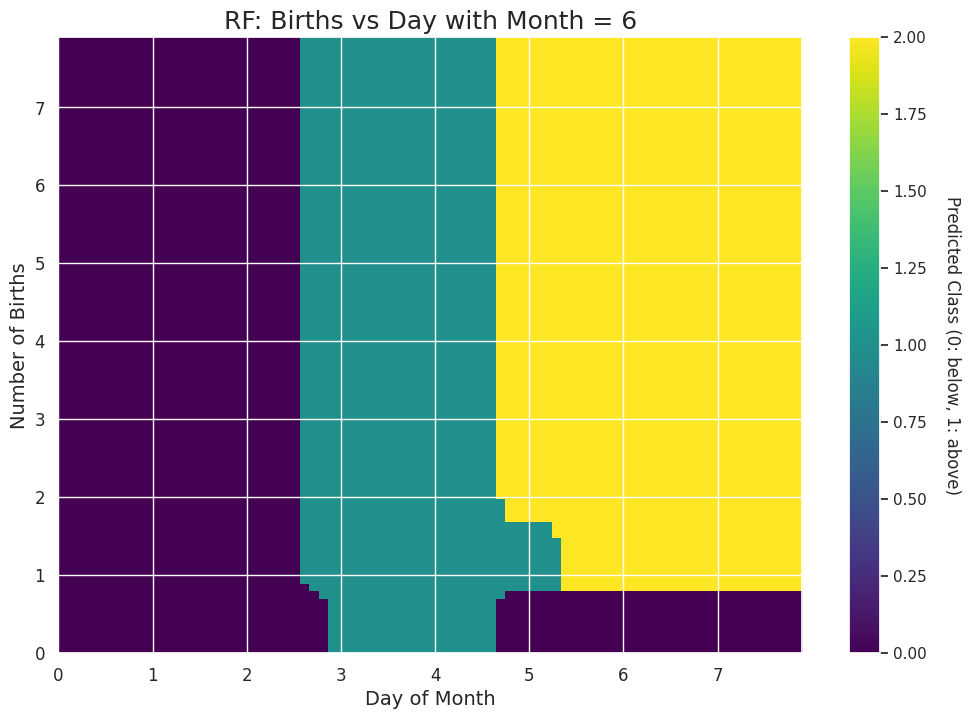

0 - below
1 - above


In [ ]:
# Section: Heatmap for RF prediction plane

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))

# Create the heatmap
im = ax.imshow(PLANE, cmap="viridis",
               extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()],
               origin="lower", aspect="auto")

# Set axis labels and ticks
ax.set_xlabel("Day of Month", fontsize=14)
ax.set_ylabel("Number of Births", fontsize=14)
ax.set_title(f"RF: Births vs Day with Month = 6", fontsize=18)

# Reduced ticks for readability
reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)

ax.set_xticks(HORIZONT[reduced_tick_indices])
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{x:.0f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)
ax.set_yticklabels([f"{y:.0f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Class (0: below, 1: above)', rotation=270, labelpad=25)

plt.show()

print("0 - below")
print("1 - above")


### Second : Digits classification via <b>Decision Trees</b>  

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "digits_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('actual_digit', axis=COLUMN)
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns
SPECIES = [str(i) for i in range(10)]   # digits from 0 to 9
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:, 0:64]  # all pixel columns
y_all = df_tidy['actual_digit'].to_numpy()
if False:
    print(f"The labels/species are \n {y_all} \n ")
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model.fit(X_train, y_train)
if False:  print("Created and trained a classifier with best_depth =", best_depth)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" depth
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_depth = 1
best_accuracy = 0.0
for depth in range(1,6):
    dtree_cv_model = tree.DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(dtree_cv_model, X_train, y_train, cv=5)
    this_cv_accuracy = cv_scores.mean()
    if False: print(f"depth: {depth:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:
        best_accuracy = this_cv_accuracy
        best_depth = depth
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)
print(f"best_depth = {best_depth}  \n    yields the highest cv accuracy: {best_accuracy}\n")

# Section 11:  Here's where the model-building happens with the best-found parameters:
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model_final.fit(X_all, y_all)
print("Created and trained a classifier with best_depth =", best_depth)


Cross-validating...
best_depth = 5  
    yields the highest cv accuracy: 0.6704257825226174

Created and trained a classifier with best_depth = 5


In [ ]:
# Let's print things in a vertical table

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:
            result = ""
            num_correct += 1

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!  use the model you want:
predicted_labels = dtree_model_final.predict(X_test)
compare_labels(predicted_labels, actual_labels)



row   # :    predicted actual         result
row   0 :            1 6              incorrect
row   1 :            5 5              
row   2 :            5 5              
row   3 :            8 8              
row   4 :            8 8              
row   5 :            3 9              incorrect
row   6 :            0 0              
row   7 :            7 7              
row   8 :            8 2              incorrect
row   9 :            7 7              
row  10 :            6 6              
row  11 :            4 4              
row  12 :            3 2              incorrect
row  13 :            0 0              
row  14 :            0 0              
row  15 :            3 3              
row  16 :            8 7              incorrect
row  17 :            3 9              incorrect
row  18 :            8 1              incorrect
row  19 :            8 2              incorrect
row  20 :            4 4              
row  21 :            3 3              
row  22 :            8 8

242

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix36 <= 0.5\ngini = 0.9\nsamples = 1768\nvalue = [173, 179, 175, 181, 178, 178, 179, 177, 172, 176]\nclass = 3", fillcolor="#ffffff"] ;
1 [label="pix33 <= 0.5\ngini = 0.544\nsamples = 266\nvalue = [169, 0, 4, 1, 5, 25, 5, 0, 2, 55]\nclass = 0", fillcolor="#f1bb94"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pix21 <= 6.0\ngini = 0.45\nsamples = 76\nvalue = [0, 0, 4, 1, 1, 11, 3, 0, 1, 55]\nclass = 9", fillcolor="#ed798e"] ;
1 -> 2 ;
3 [label="pix18 <= 10.0\ngini = 0.609\nsamples = 19\nvalue = [0, 0, 3, 0, 1, 11, 3, 0, 0, 1]\nclass = 5", fillcolor="#9ccef2"] ;
2 -> 3 ;
4 [label="pix10 <= 13.5\ngini = 0.688\nsamples = 8\nvalue = [0, 0, 3, 0, 1, 0, 3, 0, 0, 1]\nclass = 2", fillcolor="#ffffff"] ;
3 -> 4 ;
5 [label="g

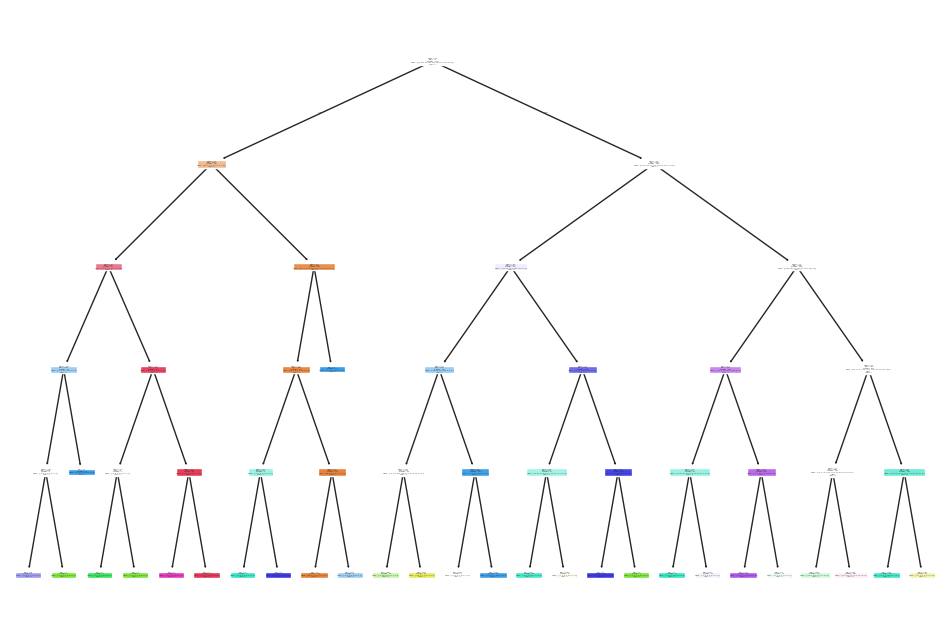

In [ ]:
# Step 3: Now, let's see the tree!

import matplotlib.pyplot as plt
from sklearn import tree

FEATURES = COLUMNS  # use all 64 features

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv
model = dtree_model_final

tree.export_graphviz(model, out_file=filename,
                     feature_names=COLUMNS,  # use all 64 features
                     filled=True,
                     rotate=False,
                     class_names=SPECIES,
                     leaves_parallel=True)

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

# Tree display...
fig = plt.figure(figsize=(12,8))
tree_plot = tree.plot_tree(model,
                           feature_names=FEATURES,   # Glad to have these!
                           class_names=SPECIES,      # and these!!
                           filled=True)

plt.show()


In [ ]:
# Ok!  We have our model, let's use it...
#
# ... in a data-trained predictive model, using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"

def predictive_model( Features, model ):
    """ input: a list of features (length 64 for digits)
        output: the predicted digit from 0-9
    """
    our_features = np.asarray([Features])             # extra brackets needed so it's 2d
    predicted_digit_list = model.predict(our_features)  # PREDICT!
    predicted_digit = int(round(predicted_digit_list[0]))  # unpack the result
    return predicted_digit

# Try it!
# Features = eval(input("Enter new Features: "))

ListofFeatures = [
    [0]*64,                                  # blank image
    [15]*64,                                 # full white image (max pixel)
    list(range(64)),                         # increasing pixel values
    [0,0,5,15] + [0]*60,                     # test pattern 1
    [0]*30 + [10]*10 + [0]*24,              # test pattern 2
]

for Features in ListofFeatures:
    predicted_digit = predictive_model(Features, dtree_model_final)
    print(f"From the Features {Features[:5]}... I predict : {predicted_digit}")


From the Features [0, 0, 0, 0, 0]... I predict : 6
From the Features [15, 15, 15, 15, 15]... I predict : 1
From the Features [0, 1, 2, 3, 4]... I predict : 1
From the Features [0, 0, 5, 15, 0]... I predict : 6
From the Features [0, 0, 0, 0, 0]... I predict : 2


In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
pixel_A = 10
pixel_B = 20
# the rest will be zero

VERTICAL = np.arange(0, 16, 1)  # pixel intensity from 0 to 15
HORIZONT = np.arange(0, 16, 1)
PLANE = np.zeros((len(HORIZONT), len(VERTICAL)))  # the output array
MODEL = dtree_model_final

col = 0
row = 0
for value_A in VERTICAL:           # for pixel_A value
    for value_B in HORIZONT:       # for pixel_B value
        Features = [0]*64
        Features[pixel_A] = value_A
        Features[pixel_B] = value_B
        output = predictive_model(Features, MODEL)
        PLANE[row, col] = output
        row += 1
    row = 0
    col += 1
    print(".", end="")  # so we know it's running
    if col % 8 == 0: print()

print("\n", PLANE[0:3,0:3])  # small part of the output


........
........

 [[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]


Digits classification from 0 to 9


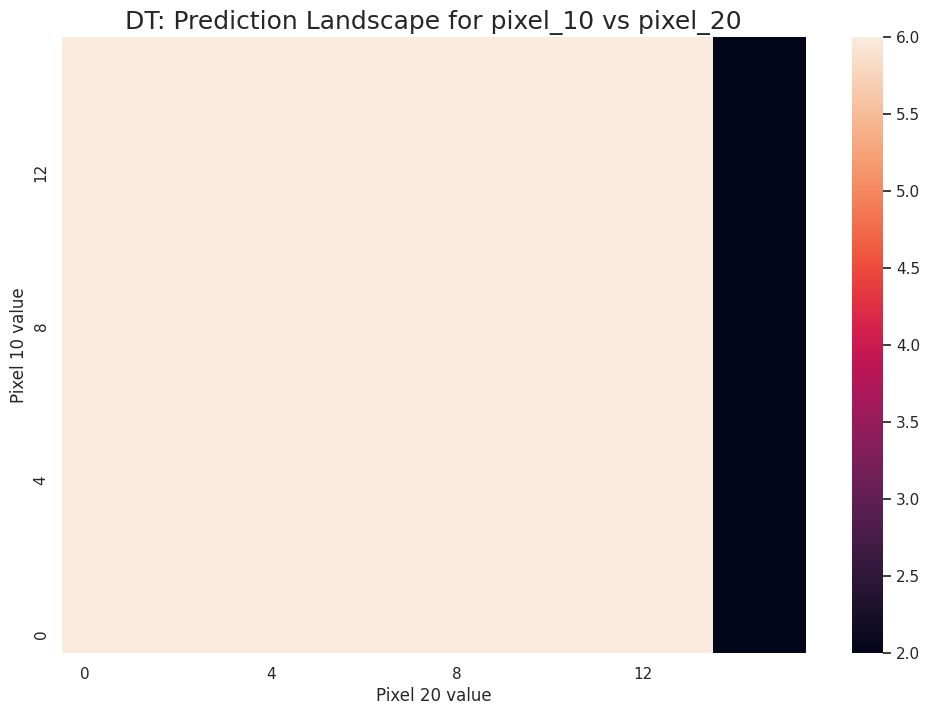

In [ ]:
import seaborn as sns

# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis()  # to match our usual direction
ax.set(xlabel="Pixel 20 value", ylabel="Pixel 10 value")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])
ax.set_title("DT: Prediction Landscape for pixel_10 vs pixel_20", fontsize=18)

print("Digits classification from 0 to 9")


  ### Digits classification via <b>Random Forests</b>

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "digits_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)     # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  (SKIPPED for digits) No need to drop any column

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_tidy.columns[0:64]                      # first 64 are features (pixels)
SPECIES = [str(d) for d in range(10)]                # digits 0 to 9
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }   # str to int
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }   # str to int
if False: print(f"{COLUMNS = } \n{COLUMNS_INDEX = } \n{SPECIES = } \n{SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_tidy.to_numpy()      # yields the numpy array
A = A.astype('float64')     # ensure float
NUM_ROWS, NUM_COLS = A.shape
if False: print(f"The dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:64]   # features (pixels)
y_all = A[:,64]     # labels (digits)
if False:
    print("Labels:\n", y_all)
    print("Features:\n", X_all[0:5,:])

# Section 7:  80/20 split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n")
    print("y_test:", y_test)
    print("X_test (first few rows):", X_test[0:5,:])
    print("y_train:", y_train)
    print("X_train (first few rows):", X_train[0:5,:])

# Section 8:  Model-building (guessing parameters first)
from sklearn import tree
from sklearn import ensemble
best_d = 1
best_num_trees = 42
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, n_estimators=best_num_trees, max_samples=0.5)
rforest_model.fit(X_train, y_train)
if False: print(f"Built a Random Forest with depth={best_d} and number of trees={best_num_trees}")

# Section 9:  Try the model
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test
if False:
    print("Predicted:", predicted_labels)
    print("Actual   :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"{num_correct} correct out of {total} = {num_correct*100/total}%")

# Section 10:  Cross-validation to find best depth and tree count
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_d = 1
best_num_trees = 50
best_accuracy = 0
for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, n_estimators=ntrees, max_samples=0.5)
        cv_scores = cross_val_score(rforest_model, X_train, y_train, cv=5)
        average_cv_accuracy = cv_scores.mean()
        if True: print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_num_trees = ntrees
if True: print(f"best_depth: {best_d} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

# Section 11:  Final model on all data
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_d, n_estimators=best_num_trees, max_samples=0.5)
rforest_model_tuned.fit(X_all, y_all)
if True: print("Created and trained a classifier with best_depth =", best_d)
if False: print("Feature importances:", rforest_model_tuned.feature_importances_)


Cross-validating...
depth:  1 ntrees:  50 cv accuracy:  0.7086
depth:  1 ntrees: 150 cv accuracy:  0.7567
depth:  1 ntrees: 250 cv accuracy:  0.7496
depth:  2 ntrees:  50 cv accuracy:  0.8239
depth:  2 ntrees: 150 cv accuracy:  0.8359
depth:  2 ntrees: 250 cv accuracy:  0.8423
depth:  3 ntrees:  50 cv accuracy:  0.8784
depth:  3 ntrees: 150 cv accuracy:  0.8890
depth:  3 ntrees: 250 cv accuracy:  0.8975
depth:  4 ntrees:  50 cv accuracy:  0.9116
depth:  4 ntrees: 150 cv accuracy:  0.9264
depth:  4 ntrees: 250 cv accuracy:  0.9293
depth:  5 ntrees:  50 cv accuracy:  0.9385
depth:  5 ntrees: 150 cv accuracy:  0.9469
depth:  5 ntrees: 250 cv accuracy:  0.9427
best_depth: 5 and best_num_trees: 150 are our choices. Acc: 0.9469463448863493
Created and trained a classifier with best_depth = 5


One of the forest's trees is DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=575020737)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix26 <= 5.5\ngini = 0.9\nsamples = 688\nvalue = [81, 85, 93, 96, 94, 82, 87, 84, 91, 91]\nclass = 3", fillcolor="#feffff"] ;
1 [label="pix43 <= 3.5\ngini = 0.787\nsamples = 233\nvalue = [0, 25, 80, 91, 2, 0, 2, 59, 33, 15]\nclass = 3", fillcolor="#f5fef7"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pix29 <= 15.5\ngini = 0.45\nsamples = 83\nvalue = [0, 5, 3, 79, 0, 0, 0, 1, 6, 15]\nclass = 3", fillcolor="#78ed91"] ;
1 -> 2 ;
3 [label="pix2 <= 0.5\ngini = 0.355\nsamples = 75\nvalue = [0.0, 3.0, 2.0, 78.0, 0.0, 0.0, 0.0, 1.0, 6.0, 8.0]\nclass = 3", fillcolor="#65eb82"] ;
2 -> 3 ;
4 [label="pix37 <= 6.0\ngin

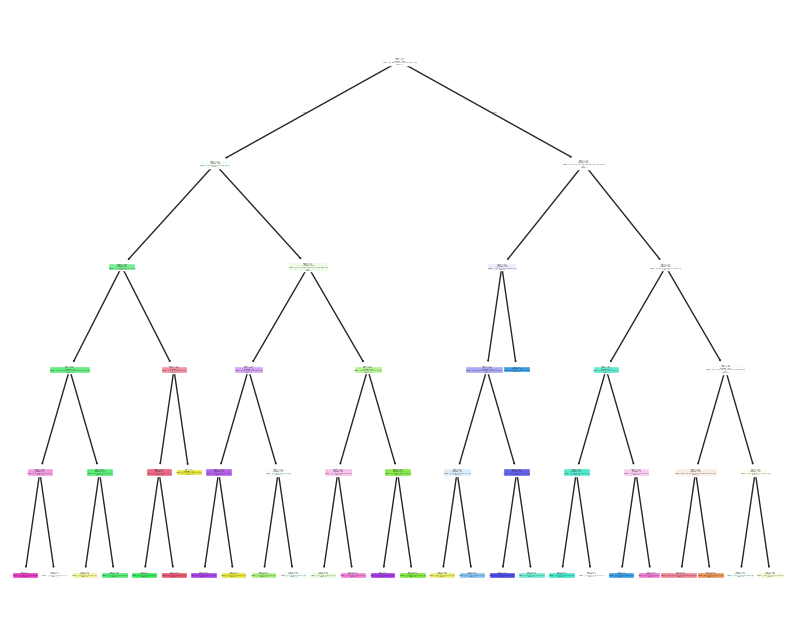

In [ ]:
#continued: View one tree from the Random Forest

import matplotlib.pyplot as plt
from sklearn import tree

# re-define COLUMNS and SPECIES like in Section 4
COLUMNS = df_model1.columns                       # 64 pixel columns
SPECIES = [str(d) for d in range(10)]             # digits 0 to 9

FEATURES = COLUMNS[0:64]  # all 64 pixel features

tree_index = 28   # pick one tree
one_rf_tree = rforest_model_tuned.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

filename = f'rf_tree_{tree_index:03d}.gv'  # like rf_tree_028.gv
tree.export_graphviz(one_rf_tree, out_file=filename,
                     feature_names=FEATURES,
                     filled=True,
                     rotate=False,
                     class_names=SPECIES,
                     leaves_parallel=True)

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

# plot the tree
fig = plt.figure(figsize=(10, 8))
tree_plot = tree.plot_tree(one_rf_tree,
                           feature_names=FEATURES,
                           class_names=SPECIES,
                           filled=True)
plt.show()


In [ ]:
# final predictive model (random forests), with tuned parameters + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of 64 features (pixels)
        output: the predicted digit (from 0 to 9)
    """
    our_features = np.asarray([Features])                 # make it 2D
    predicted_digit = Model.predict(our_features)         # predict
    predicted_digit = int(round(predicted_digit[0]))      # unpack
    return predicted_digit

# Try it!
# Features = eval(input("Enter new Features: "))

LoF = [
    X_all[0],      # known label is y_all[0]
    X_all[100],    # known label is y_all[100]
    X_all[500],
    X_all[1234],
    X_all[777],
    X_all[50],
    X_all[90],
    X_all[15]
]

for Features in LoF:
    predicted_digit = predictive_model(Features, rforest_model_tuned)
    print(f"Prediction: {predicted_digit}")


Prediction: 8
Prediction: 4
Prediction: 3
Prediction: 6
Prediction: 0
Prediction: 5
Prediction: 8
Prediction: 4


In [ ]:
for Features in LoF:
    predicted_digit = predictive_model(Features, rforest_model_tuned)
    actual_digit = y_all[np.where(X_all == Features)[0][0]]  # نحصل على رقم السطر الحقيقي
    print(f"Prediction: {predicted_digit}   |   Actual: {int(actual_digit)}")


Prediction: 8   |   Actual: 8
Prediction: 4   |   Actual: 8
Prediction: 3   |   Actual: 8
Prediction: 6   |   Actual: 8
Prediction: 0   |   Actual: 8
Prediction: 5   |   Actual: 8
Prediction: 8   |   Actual: 8
Prediction: 4   |   Actual: 8


In [ ]:
# Step 10: Plotting the prediction landscape using two pixels

pixel1 = 10   # use any 2 pixels
pixel2 = 20

VERTICAL = np.arange(0,17,.25)   # pixel1
HORIZONT = np.arange(0,17,.25)   # pixel2
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) )
MODEL = rforest_model_tuned

col = 0
row = 0
for val1 in VERTICAL:
    for val2 in HORIZONT:
        Features = np.zeros(64)          # 64 pixels, all zero
        Features[pixel1] = val1          # set value for pixel1
        Features[pixel2] = val2          # set value for pixel2
        output = predictive_model(Features, MODEL)
        PLANE[row, col] = output
        row += 1
    row = 0
    col += 1
    print(".", end="")
    if col % 42 == 0: print()

print("\n", PLANE[0:3,0:3])  # just to check


..........................................
..........................
 [[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]


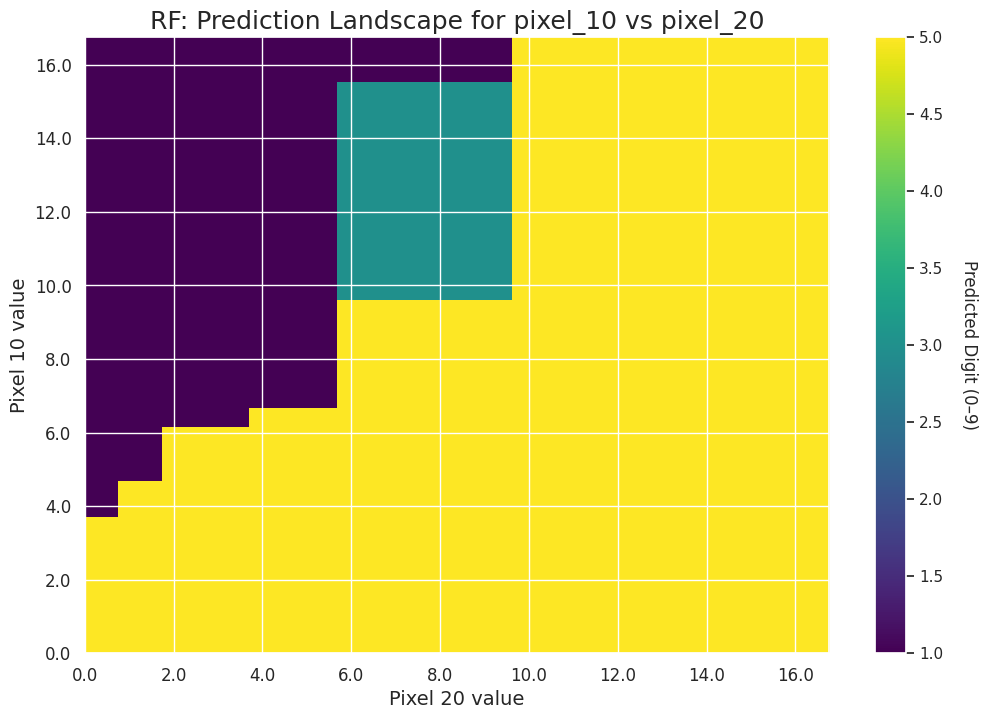

Digits classification from 0 to 9


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))

# Create the heatmap
im = ax.imshow(PLANE, cmap="viridis", extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()], origin="lower", aspect="auto")

# Set axis labels and ticks
ax.set_xlabel(f"Pixel {pixel2} value", fontsize=14)
ax.set_ylabel(f"Pixel {pixel1} value", fontsize=14)

ax.set_title(f"RF: Prediction Landscape for pixel_{pixel1} vs pixel_{pixel2}", fontsize=18)

# Calculate reduced ticks for clarity
reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)

# Set ticks and tick labels
ax.set_xticks(HORIZONT[reduced_tick_indices])
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{x:.1f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)
ax.set_yticklabels([f"{y:.1f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)

# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Digit (0–9)', rotation=270, labelpad=25)

plt.show()

print("Digits classification from 0 to 9")
